In [1]:
import pandas as pd
import datetime
import random
import os
import sys

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
%matplotlib inline

In [2]:
from ISS.candles import Candles

In [3]:
securityids = ['MOEX', 'SBER', 'AFKS', 'SU25081RMFS9']
dt = datetime.date(2017, 9, 11)

We can load candles for specific securityid overall boards

In [4]:
%%time
C = Candles(engine='stock', market='shares', securityid=securityids[0], interval=24)
print(C)
C.load()
print(C)

------------------------------------------------------------------
Candles (0 entries, begin: , end: , interval: 24)
engine: stock, market: shares, boardid: None, securityid: MOEX
------------------------------------------------------------------
------------------------------------------------------------------
Candles (1152 entries, begin: , end: , interval: 24)
engine: stock, market: shares, boardid: None, securityid: MOEX
------------------------------------------------------------------
CPU times: user 108 ms, sys: 0 ns, total: 108 ms
Wall time: 1.89 s


In [5]:
C.candles.head()

,open,close,high,low,value,volume,begin,end
0,58.15,55.00,58.15,51.23,334608786.3,6082550,2013-02-15,2013-02-15 23:59:59
1,55.00,56.02,56.60,54.18,152576101.0,2767350,2013-02-18,2013-02-18 23:59:59
2,56.54,56.00,56.60,55.95,98840767.4,1761630,2013-02-19,2013-02-19 23:59:59
3,56.30,55.40,56.50,54.98,79847643.3,1438600,2013-02-20,2013-02-20 23:59:59
4,55.18,54.70,55.39,54.41,28486704.7,519350,2013-02-21,2013-02-21 23:59:59


Or we can load candles for specific securityid, boardid

In [6]:
%%time
C = Candles(engine='stock', market='shares', boardid='TQBR', securityid=securityids[0], interval=24)
print(C)
C.load()
print(C)

------------------------------------------------------------------
Candles (0 entries, begin: , end: , interval: 24)
engine: stock, market: shares, boardid: TQBR, securityid: MOEX
------------------------------------------------------------------
------------------------------------------------------------------
Candles (1119 entries, begin: , end: , interval: 24)
engine: stock, market: shares, boardid: TQBR, securityid: MOEX
------------------------------------------------------------------
CPU times: user 92 ms, sys: 8 ms, total: 100 ms
Wall time: 1.1 s


In [7]:
C.candles.head()

,open,close,high,low,value,volume,begin,end
0,48.07,48.43,48.65,47.42,8767126.7,181760,2013-04-04,2013-04-04 23:59:59
1,48.43,48.50,48.61,47.50,5964565.5,123940,2013-04-05,2013-04-05 23:59:59
2,48.67,47.52,48.88,47.50,5280065.5,110530,2013-04-08,2013-04-08 23:59:59
3,48.23,47.40,48.23,47.40,9993069.9,209980,2013-04-09,2013-04-09 23:59:59
4,48.00,46.87,48.00,46.75,20036515.1,424170,2013-04-10,2013-04-10 23:59:59


We even can specify:
- __dt1__ - begin of period
- __dt2__ - end of period
- __interval__ - default _10 (10m)_:
    - __1__ - 1m
    - __10__ - 10m
    - __60__ - 1h
    - __24__ - 1d

In [8]:
%%time
dt = datetime.date(2017, 9, 15)
C = Candles(engine='stock', market='shares', boardid='TQBR', securityid=securityids[0], interval=1,
            dt1=dt, dt2=dt)
print(C)
C.load()
print(C)

------------------------------------------------------------------
Candles (0 entries, begin: 2017-09-15, end: 2017-09-15, interval: 1)
engine: stock, market: shares, boardid: TQBR, securityid: MOEX
------------------------------------------------------------------
------------------------------------------------------------------
Candles (515 entries, begin: 2017-09-15, end: 2017-09-15, interval: 1)
engine: stock, market: shares, boardid: TQBR, securityid: MOEX
------------------------------------------------------------------
CPU times: user 56 ms, sys: 12 ms, total: 68 ms
Wall time: 1.55 s


In [9]:
C.candles.head()

,open,close,high,low,value,volume,begin,end
0,113.20,113.20,113.20,113.20,5036268.0,44490,2017-09-15 09:59:00,2017-09-15 09:59:59
1,112.87,112.91,112.95,112.83,740712.6,6560,2017-09-15 10:00:00,2017-09-15 10:00:59
2,112.89,112.85,112.90,112.85,116279.4,1030,2017-09-15 10:01:00,2017-09-15 10:01:59
3,112.84,112.48,112.86,112.48,3319497.4,29480,2017-09-15 10:02:00,2017-09-15 10:02:59
4,112.57,112.56,112.59,112.50,21385.3,190,2017-09-15 10:03:00,2017-09-15 10:03:59


In [10]:
%%time
dt1 = datetime.date(2017, 9, 14)
dt2 = datetime.date(2017, 9, 15)
C = Candles(engine='stock', market='shares', boardid='TQBR', securityid=securityids[0], interval=1,
            dt1=dt1, dt2=dt2)
print(C)
C.load()
print(C)

------------------------------------------------------------------
Candles (0 entries, begin: 2017-09-14, end: 2017-09-15, interval: 1)
engine: stock, market: shares, boardid: TQBR, securityid: MOEX
------------------------------------------------------------------
------------------------------------------------------------------
Candles (1025 entries, begin: 2017-09-14, end: 2017-09-15, interval: 1)
engine: stock, market: shares, boardid: TQBR, securityid: MOEX
------------------------------------------------------------------
CPU times: user 96 ms, sys: 8 ms, total: 104 ms
Wall time: 1.6 s


We can make a plots

In [11]:
import matplotlib.pyplot as plt
from ISS.plots import candlesplot

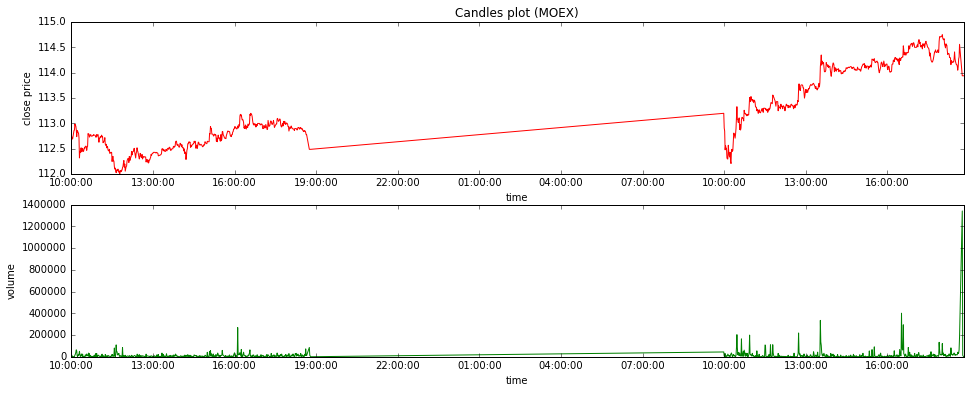

In [12]:
fig, [ax1, ax2] = candlesplot(C.candles, C.securityid)
plt.show()

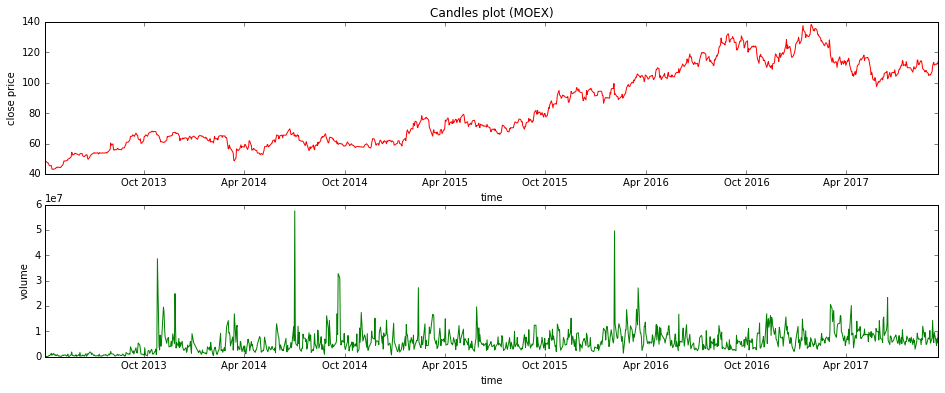

CPU times: user 504 ms, sys: 24 ms, total: 528 ms
Wall time: 1.54 s


In [14]:
%%time
C = Candles(engine='stock', market='shares', boardid='TQBR', securityid=securityids[0], interval=24)
C.load()
fig, [ax1, ax2] = candlesplot(C.candles, C.securityid)
plt.show()